# K - Nearest Neighbor Classification

- Context

In this project, I have added a Breast cancer dataset. It is an official Breast cancer dataset. The target column in the diagnosis column. M stands for Malignant, B stands for Benign.
M means the person has Cancer and B means the person do not have Cancer

Rest of the columns with be considered independent variables and will be used to train the model. 
Your job is to apply K-NN classifier and check if a person has cancer or not. You can do the same task with Logistic Regression model as well. I would encourage you to do it with Logistic Regression as well. So you may compare the accuracy of both models.

___
- Question to solve

***1- Clean the dataset (encode labels, drop useless columns like `id`)***

***2- Perform EDA. You may drop the columns which are not highly correlated (if any)***

***3- Standardize the variables***

***4- Fit the KNN classifier on the dataset***

***5- Perform Predictions and Evaluations***

***6- Choose a K Value***

***7- Retrain with the new K Value***

___
- Recommended methodology

***You will be using sklearn's KNN Classifier `from sklearn.neighbors import KNeighborsClassifier`.***

***For Model evaluation, you can use `from sklearn.metrics import classification_report,confusion_matrix`***

___

***Things to do***
- Perform the data pre-processing.
- Deal with missing values
- Perform EDA
- Using `StandardScalar` standardize the variables expect the taregt variable
- Convert the scaled features to a dataframe
- Split into training and testing set
- Fit KNN classifier
- Get Predictions
- Get a K-Value
- Create a plot `K-value` vs `error` (Explained below)
- Retrain it with the new K value with the least error (Explained below)
 
***What will be new***
- You will learn the K-NN classifier and how it works.
- How to get the optimal value of K
 
***What will be tricky***

- Getting the optimal value of K will be tricky in this project. What you can do is:
> You can create a for loop which will train multiple KNN models with different values of K every time and then you will keep track of the errors of each of these models in a list. At the end, we will choose the k-value for which the error is the lowest in the list

## Intro

In [18]:
import pandas as pd
import numpy as np

In [68]:
df = pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [69]:
# drop columns
df = df.drop(['id','Unnamed: 32'], axis=1)

In [70]:
# replace diagnosis with numerical values
df['diagnosis'] = np.where(df['diagnosis'] == 'M', 1,0)

## Data Exploration

In [71]:
# we use a test_df in order to assess the columns that we would like to keep
# this is an iterative process
  # 1/ we remove 'perimeter', 'areas' as radius is a a very close proxy
  # 2/ we remove 'concavity' as it is a strong proxy to 'concave points'

df_test = df.drop(['perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst', 
                  'concavity_mean', 'concavity_se', 'concavity_worst'], axis=1)

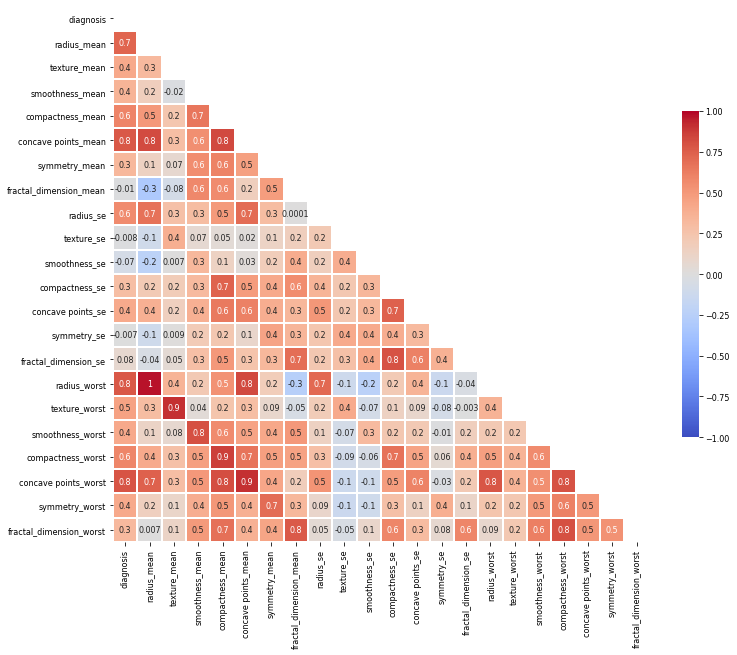

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,12))  
mask = np.triu(df_test.corr())

sns.heatmap(df_test.corr(), vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='white', square=True, mask = mask, cbar=True, cbar_kws={"shrink": .5}, annot=True, fmt='.1g')


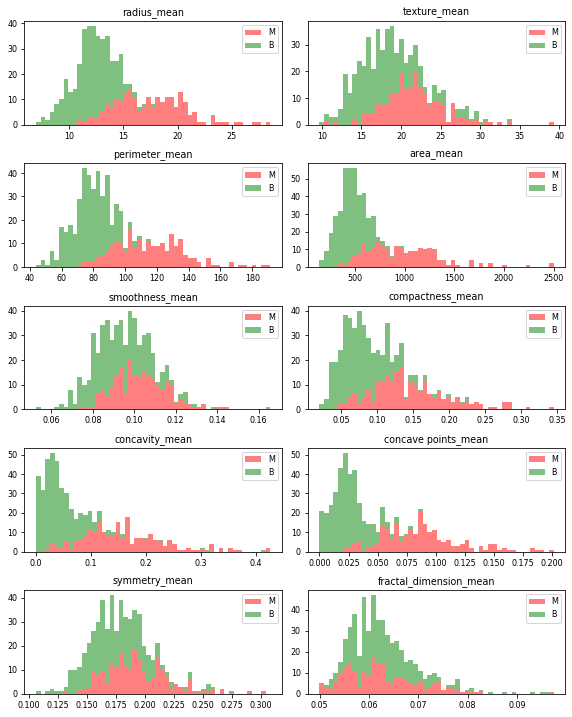

In [73]:
features_mean=list(df.columns[1:11])
# split dataframe into two based on diagnosis
dfM = df[df['diagnosis'] ==1]
dfB = df[df['diagnosis'] ==0]

#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8,10))
axes = axes.ravel()

for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(df[features_mean[idx]]) - min(df[features_mean[idx]]))/50
    
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(df[features_mean[idx]]), max(df[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])

    plt.tight_layout()
plt.show()

- values of cell radius (hence perimeter, area) compactness, concave points (hence concavity) can be used in cancer detection (positive correlation) 
- values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. 
- there are no NaN values and all data is numeric

## Machile Learning 

### Preparation

In [83]:
# Standardise data

dfX = df.drop(['diagnosis', 'perimeter_mean','area_mean','perimeter_se','area_se','perimeter_worst','area_worst', 'concavity_mean', 'concavity_se', 'concavity_worst'], axis=1)

from sklearn import preprocessing
stand_dfX = preprocessing.scale(dfX)   # what is the differentce with StandarScalar method?

col_names = dfX.columns
stand_dfX = pd.DataFrame(stand_dfX, columns = col_names)
stand_dfX

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,smoothness_worst,compactness_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.568466,3.283515,2.532475,2.217515,2.255747,2.489734,-0.565265,-0.214002,...,0.660820,1.148757,0.907083,1.886690,-1.359293,1.307686,2.616665,2.296076,2.750622,1.937015
1,1.829821,-0.353632,-0.826962,-0.487072,0.548144,0.001392,-0.868652,0.499255,-0.876244,-0.605351,...,0.260162,-0.805450,-0.099444,1.805927,-0.369203,-0.375612,-0.430444,1.087084,-0.243890,0.281190
2,1.579888,0.456187,0.942210,1.052926,2.037231,0.939685,-0.398008,1.228676,-0.780083,-0.297005,...,1.424827,0.237036,0.293559,1.511870,-0.023974,0.527407,1.082932,1.955000,1.152255,0.201391
3,-0.768909,0.253732,3.283553,3.402909,1.451707,2.867383,4.910919,0.326373,-0.110409,0.689702,...,1.115007,4.732680,2.047511,-0.281464,0.133984,3.394275,3.893397,2.175786,6.046041,4.935010
4,1.750297,-1.151816,0.280372,0.539340,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.483067,...,1.144205,-0.361092,0.499328,1.298575,-1.466770,0.220556,-0.313395,0.729259,-0.868353,-0.397100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,1.041842,0.219060,2.320965,-0.312589,-0.931027,2.782080,0.071025,1.086384,...,2.067178,-1.138416,0.167980,1.901185,0.117700,0.378365,-0.273318,1.629151,-1.360158,-0.709091
565,1.704854,2.085134,0.102458,-0.017833,1.263669,-0.217664,-1.058611,1.300499,2.260938,-0.424010,...,0.808431,-0.189161,-0.490556,1.536720,2.047399,-0.691230,-0.394820,0.733827,-0.531855,-0.973978
566,0.702284,2.045574,-0.840484,-0.038680,0.105777,-0.809117,-0.895587,0.184892,-0.257371,-0.379342,...,0.612157,-0.891416,0.036727,0.561361,1.374854,-0.809587,0.350735,0.414069,-1.104549,-0.318409
567,1.838341,2.336457,1.525767,3.272144,2.658866,2.137194,1.043695,1.157935,0.686088,-0.173000,...,0.785721,0.326634,0.904057,1.961239,2.237926,1.430427,3.904848,2.289985,1.919083,2.219635


In [84]:
dfy = df['diagnosis']

In [85]:
X = stand_dfX
y = dfy

In [86]:
from sklearn.model_selection import train_test_split

# Prepare the test / train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Logistic Regression

In [87]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

98.46

In [88]:
coeff_df = pd.DataFrame(stand_dfX.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
14,texture_worst,1.978190
7,texture_se,1.661494
4,symmetry_mean,1.363970
18,symmetry_worst,1.260377
0,texture_mean,1.175402
15,smoothness_worst,1.072404
19,fractal_dimension_worst,0.821981
16,compactness_worst,0.628739
11,symmetry_se,0.454041
1,smoothness_mean,0.342278


In [89]:
y_pred = logreg.predict(X_test) 

from sklearn import metrics

MSE = metrics.mean_squared_error(y_test, y_pred)
RSq = metrics.r2_score(y_test, y_pred)
print(MSE)
print(RSq)

0.02631578947368421
0.8869047619047619


In [95]:
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

kfold = model_selection.KFold(n_splits=10, random_state=100)
model_kfold = LogisticRegression()
results_kfold = model_selection.cross_val_score(model_kfold, X_test, y_test, cv=kfold)

print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))
print(results_kfold)

Accuracy: 95.61%
[0.91666667 0.91666667 1.         1.         1.         1.
 0.72727273 1.         1.         1.        ]


### KNN Classifier

In [98]:
from sklearn.neighbors import KNeighborsClassifier

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
acc_knn

98.02

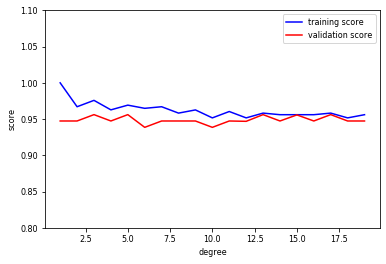

In [100]:
# trying to assess the optimal n_neighbor value

from sklearn.model_selection import validation_curve
degree = np.arange(0, 20)
train_score, val_score = validation_curve(KNeighborsClassifier(), X, y,'n_neighbors', degree, cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0.8, 1.1)
plt.xlabel('degree')
plt.ylabel('score');

In [ ]:
Note:
    - using a n_neigbor = 3 landed 98.02: is it the training value? (what about the logist regression output?)
    - when looking at the logistic model, the output was slightly higher